In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [4]:
X

array([[ 3.90164779,  8.2315577 ],
       [ 4.89022624,  6.87120989],
       [-8.43976869,  1.89807221],
       ...,
       [ 3.67308028,  5.26437762],
       [ 3.7132735 ,  6.77300485],
       [ 4.78166986,  5.24219749]])

In [5]:
y

array([1, 1, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 1, 2, 0,
       1, 2, 1, 0, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 2, 0, 2, 2, 1, 0, 1, 2,
       2, 1, 0, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 2, 0, 2, 1,
       1, 2, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2,
       2, 2, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2, 0, 1, 1, 2, 2, 1, 0, 1, 1, 0,
       2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 0, 2, 0,
       2, 1, 0, 1, 0, 2, 0, 0, 2, 0, 1, 0, 2, 1, 1, 1, 2, 1, 0, 1, 0, 0,
       2, 2, 0, 2, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 1, 2, 1, 0, 0,
       0, 2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 1, 0, 2, 0,
       1, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 2, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2, 0, 1,
       0, 0, 2, 2, 0, 1, 1, 0, 0, 2, 0, 2, 0, 0, 0,

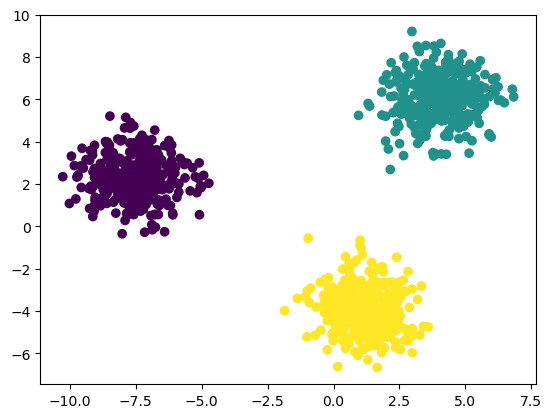

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)

In [8]:
## standarization -- feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [9]:
from sklearn.model_selection import train_test_split


In [10]:
X_train,X_test,y_train,y_test= train_test_split(
    X,y, test_size=0.33, random_state=42
)

In [12]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [13]:
from sklearn.cluster import KMeans

In [16]:
##elbow method
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\Priyal Chugh\anaconda3\anaconda3.2\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Priyal Chugh\anaconda3\anaconda3.2\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Priyal Chugh\anaconda3\anaconda3.2\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Priyal Chugh\anaconda3\anaconda3.2\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are l

In [17]:
wcss

[1339.9999999999998,
 631.8776103609705,
 68.56760255607458,
 58.66649669938235,
 49.021014872108054,
 41.712012655638254,
 37.10552994630663,
 32.72099532125148,
 28.639516690485223,
 26.720634367208795]

Text(0, 0.5, 'WCSS')

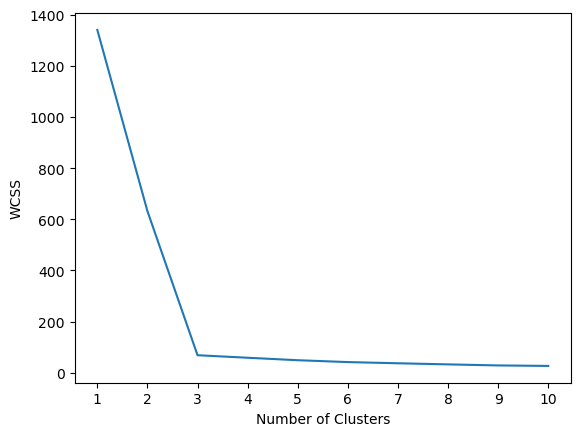

In [19]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

In [20]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [21]:
kmeans.fit_predict(X_train_scaled)

C:\Users\Priyal Chugh\anaconda3\anaconda3.2\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Priyal Chugh\anaconda3\anaconda3.2\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 2, 1, 1, 2, 1, 0, 1, 0, 2, 2,
       2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 2, 0, 2, 0, 1, 2, 1,
       2, 0, 2, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 1, 1,
       2, 0, 0, 2, 0, 2, 1, 0, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0,
       0, 2, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 2, 0, 1, 0, 0,
       2, 2, 0, 2, 1, 0, 1, 0, 0, 2, 0, 2, 0, 0, 1, 1, 1, 1, 2, 1, 2, 2,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 1, 2, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 2, 2, 2, 1, 0, 2, 1, 1, 2, 1, 2, 0, 2, 2, 1, 2, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 1, 2, 1, 0, 1,
       2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0,
       0, 1, 2, 0, 0, 1, 2, 0, 1, 0, 2, 2, 0, 1, 0, 2, 1, 2, 0, 1, 1, 1,
       1, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1,
       0, 1, 1, 0, 1, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2,

In [23]:
y_pred=kmeans.predict(X_test_scaled)
y_pred

array([0, 1, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 2, 2, 2, 0, 0, 1, 2, 1, 0, 1, 2, 0, 2, 1, 2, 1, 1, 2, 0, 0, 1,
       2, 2, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 1, 2, 2, 1, 2, 0, 1, 1,
       1, 2, 0, 1, 0, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 0, 1, 2, 1, 0, 2, 2, 2, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0,
       1, 1, 2, 0, 1, 1, 2, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 2,
       1, 0, 2, 1, 0, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 2, 1, 0, 2, 1, 1,
       0, 1, 1, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 0, 2, 1, 1, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1,
       1, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2, 0, 2, 1,
       1, 1, 0, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2, 0, 0, 0, 2, 1, 2, 2, 0, 0,
       0, 1, 2, 1, 1, 0, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1,
       1, 0, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 0,
       2, 0, 0, 2, 1, 1, 0, 0, 0, 2, 2, 2, 2, 0, 1,

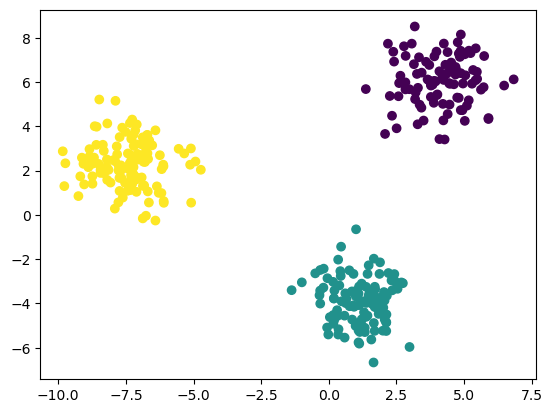

In [26]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [ ]:
#validating the k value
#kneelocator
# silhoutee scoring

In [27]:
#kneelocator
!pip install kneed

In [29]:
from kneed import KneeLocator

In [31]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [32]:
kl.elbow

3

In [33]:
#silhoutte scoring
from sklearn.metrics import silhouette_score


In [38]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

C:\Users\Priyal Chugh\anaconda3\anaconda3.2\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Priyal Chugh\anaconda3\anaconda3.2\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Priyal Chugh\anaconda3\anaconda3.2\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Priyal Chugh\anaconda3\anaconda3.2\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are l

In [39]:
silhouette_coefficients

[0.5821146152148587,
 0.8224434153418291,
 0.6697073137179732,
 0.5081292915670022,
 0.350036152166773,
 0.3485713667078819,
 0.3527028689514006,
 0.3540171728604438,
 0.3466653154524542]

Text(0, 0.5, 'silhouette_coefficients')

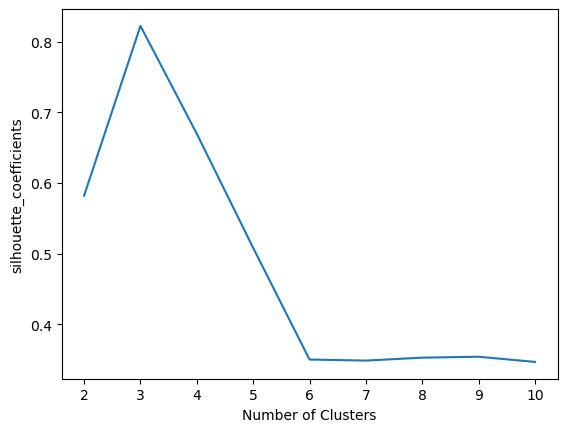

In [41]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette_coefficients")